In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import StratifiedKFold,KFold,cross_validate
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
import scipy.stats
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict,cross_val_score,GridSearchCV,train_test_split
import warnings
warnings.simplefilter(action='ignore')
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans

In [2]:
d1=pd.read_csv('DS2_C6_S2_WorldCities_Data_Practice.csv')
d2=pd.read_csv('DS2_C6_S2_MoveHubQualityOfLife_Data_Practice.csv')
d3=pd.read_csv('DS2_C6_S2_MoveHubCostOfLiving_Data_Practice.csv')
d4=pd.read_csv('DS2_C6_S2_Cities_Data_Practice.csv')

In [3]:
d1=d1.rename(columns={'city':'City'})

In [4]:
d1.sort_values(by='population',ascending=False)

,City,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140
...,...,...,...,...,...,...,...,...,...,...,...
9469,Wé,We,-20.9000,167.2667,New Caledonia,NC,NCL,Province Îles,admin,NaN,1540672599
9470,Preševo,Presevo,42.3067,21.6500,Serbia,RS,SRB,Preševo,admin,NaN,1688970219
9471,Bujanovac,Bujanovac,42.4667,21.7667,Serbia,RS,SRB,Bujanovac,admin,NaN,1688743477
9472,Kitamilo,Kitamilo,0.2222,33.2061,Uganda,UG,UGA,Buvuma,admin,NaN,1800610172


In [5]:
d1.drop_duplicates(subset='City',keep='first')

,City,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140
...,...,...,...,...,...,...,...,...,...,...,...
26564,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,1304217709
26565,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
26566,Cheremoshna,Cheremoshna,51.3894,30.0989,Ukraine,UA,UKR,Kyyivs’ka Oblast’,NaN,0.0,1804043438
26567,Ambarchik,Ambarchik,69.6510,162.3336,Russia,RU,RUS,Sakha (Yakutiya),NaN,0.0,1643739159


In [6]:
df=d1.merge(d2, on='City',how='inner')
df=df.merge(d3, on='City',how='inner')
df=df.merge(d4, on='City',how='inner')

In [28]:
df.drop_duplicates(subset='City',keep='first')

,City,population,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income
0,Tokyo,7.273900,-0.154352,-0.046108,0.144636,-0.584717,0.310150,-1.776420,0.351088,1.009610,0.533190,-0.337884,1.322374,0.609084
1,Jakarta,6.578779,-1.899745,-1.737450,-2.275862,0.490461,-2.346942,0.603892,-0.289310,-0.912565,3.429340,-1.919431,-0.571465,-1.504606
2,Delhi,5.583120,-0.617645,-0.784495,0.396892,1.084420,-1.019635,0.901085,-1.875056,-1.131461,0.087092,-0.755651,-1.299319,-1.473447
4,Mumbai,4.316654,-0.616037,-1.095984,-0.811898,0.984641,-1.813344,-0.341028,-1.875056,-0.992371,-0.334609,-0.606449,-0.905137,-1.502944
5,Manila,4.262654,-2.034873,-1.881990,0.802982,0.777620,-2.471796,1.857089,-0.746736,-1.049375,-0.780707,-0.695970,-0.597628,-1.645023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,Chiang Mai,-0.379985,-1.981787,-1.820925,1.193032,-0.584324,-1.264882,-0.122809,-1.554857,-0.876083,1.536910,-0.815332,-1.194453,-1.637347
359,Brighton,-0.379650,-0.056224,0.121401,-0.817731,0.189552,-0.020315,-0.445634,0.640791,1.727861,-0.704034,0.825896,0.224999,0.032893
364,Stavanger,-0.380660,-0.249263,-0.101011,-0.515169,-0.640106,0.667368,-1.297032,3.675056,0.747392,2.247878,1.750952,1.768931,1.699587
365,Cambridge,-0.380534,0.191509,0.356699,0.870056,0.461784,0.375549,-1.062188,-0.121586,0.193313,0.341508,0.885577,0.306363,1.421479


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 386
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   387 non-null    object 
 1   city_ascii             387 non-null    object 
 2   lat                    387 non-null    float64
 3   lng                    387 non-null    float64
 4   country                387 non-null    object 
 5   iso2                   387 non-null    object 
 6   iso3                   387 non-null    object 
 7   admin_name             386 non-null    object 
 8   capital                156 non-null    object 
 9   population             386 non-null    float64
 10  id                     387 non-null    int64  
 11  Movehub Rating         387 non-null    float64
 12  Purchase Power         387 non-null    float64
 13  Health Care            387 non-null    float64
 14  Pollution              387 non-null    float64
 15  Qualit

In [9]:
num=list(df.select_dtypes(include=['float64','int64']).columns)
num

['lat',
 'lng',
 'population',
 'id',
 'Movehub Rating',
 'Purchase Power',
 'Health Care',
 'Pollution',
 'Quality of Life',
 'Crime Rating',
 'Cappuccino',
 'Cinema',
 'Wine',
 'Gasoline',
 'Avg Rent',
 'Avg Disposable Income']

In [10]:
df2=df.copy()
df=df[['City','population','Movehub Rating','Purchase Power','Health Care','Pollution','Quality of Life','Crime Rating','Cappuccino','Cinema', 'Wine','Gasoline','Avg Rent','Avg Disposable Income']]

In [29]:
df


,City,population,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income
0,Tokyo,7.273900,-0.154352,-0.046108,0.144636,-0.584717,0.310150,-1.776420,0.351088,1.009610,0.533190,-0.337884,1.322374,0.609084
1,Jakarta,6.578779,-1.899745,-1.737450,-2.275862,0.490461,-2.346942,0.603892,-0.289310,-0.912565,3.429340,-1.919431,-0.571465,-1.504606
2,Delhi,5.583120,-0.617645,-0.784495,0.396892,1.084420,-1.019635,0.901085,-1.875056,-1.131461,0.087092,-0.755651,-1.299319,-1.473447
3,Delhi,-0.404437,-0.617645,-0.784495,0.396892,1.084420,-1.019635,0.901085,-1.875056,-1.131461,0.087092,-0.755651,-1.299319,-1.473447
4,Mumbai,4.316654,-0.616037,-1.095984,-0.811898,0.984641,-1.813344,-0.341028,-1.875056,-0.992371,-0.334609,-0.606449,-0.905137,-1.502944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,Cambridge,-0.403830,0.191509,0.356699,0.870056,0.461784,0.375549,-1.062188,-0.121586,0.193313,0.341508,0.885577,0.306363,1.421479
383,Cambridge,-0.403943,0.191509,0.356699,0.870056,0.461784,0.375549,-1.062188,-0.121586,0.193313,0.341508,0.885577,0.306363,1.421479
384,Cambridge,-0.403943,0.191509,0.356699,0.870056,0.461784,0.375549,-1.062188,-0.121586,0.193313,0.341508,0.885577,0.306363,1.421479
385,Cambridge,-0.403943,0.191509,0.356699,0.870056,0.461784,0.375549,-1.062188,-0.121586,0.193313,0.341508,0.885577,0.306363,1.421479


In [30]:
df.iloc[:,1:]=StandardScaler().fit_transform(df.iloc[:,1:])

In [31]:
df=df.dropna()
df

,City,population,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income
0,Tokyo,7.273900,-0.153954,-0.045398,0.146453,-0.582215,0.312352,-1.773696,0.352006,1.008474,0.535375,-0.339751,1.320377,0.608591
1,Jakarta,6.578779,-1.897104,-1.734693,-2.272609,0.492760,-2.343995,0.603662,-0.287761,-0.911226,3.430791,-1.920518,-0.571049,-1.502399
2,Delhi,5.583120,-0.616652,-0.782891,0.398561,1.086608,-1.017060,0.900486,-1.871946,-1.129840,0.089390,-0.757312,-1.297976,-1.471280
3,Delhi,-0.404437,-0.616652,-0.782891,0.398561,1.086608,-1.017060,0.900486,-1.871946,-1.129840,0.089390,-0.757312,-1.297976,-1.471280
4,Mumbai,4.316654,-0.615045,-1.094003,-0.809514,0.986848,-1.810546,-0.340085,-1.871946,-0.990929,-0.332205,-0.608183,-0.904296,-1.500739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,Cambridge,-0.403830,0.191463,0.356922,0.871444,0.464089,0.377733,-1.060350,-0.120203,0.193228,0.343741,0.883106,0.305661,1.419948
383,Cambridge,-0.403943,0.191463,0.356922,0.871444,0.464089,0.377733,-1.060350,-0.120203,0.193228,0.343741,0.883106,0.305661,1.419948
384,Cambridge,-0.403943,0.191463,0.356922,0.871444,0.464089,0.377733,-1.060350,-0.120203,0.193228,0.343741,0.883106,0.305661,1.419948
385,Cambridge,-0.403943,0.191463,0.356922,0.871444,0.464089,0.377733,-1.060350,-0.120203,0.193228,0.343741,0.883106,0.305661,1.419948


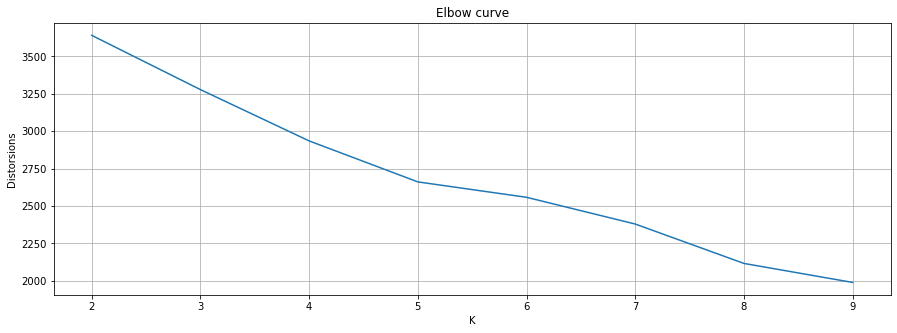

In [32]:
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df.iloc[:,1:])
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

For n_clusters = 2 The average silhouette_score is : 0.30167815723250296
For n_clusters = 3 The average silhouette_score is : 0.2078157576751979
For n_clusters = 4 The average silhouette_score is : 0.19523237266448412
For n_clusters = 5 The average silhouette_score is : 0.2129473544799725
For n_clusters = 6 The average silhouette_score is : 0.23191928225514216


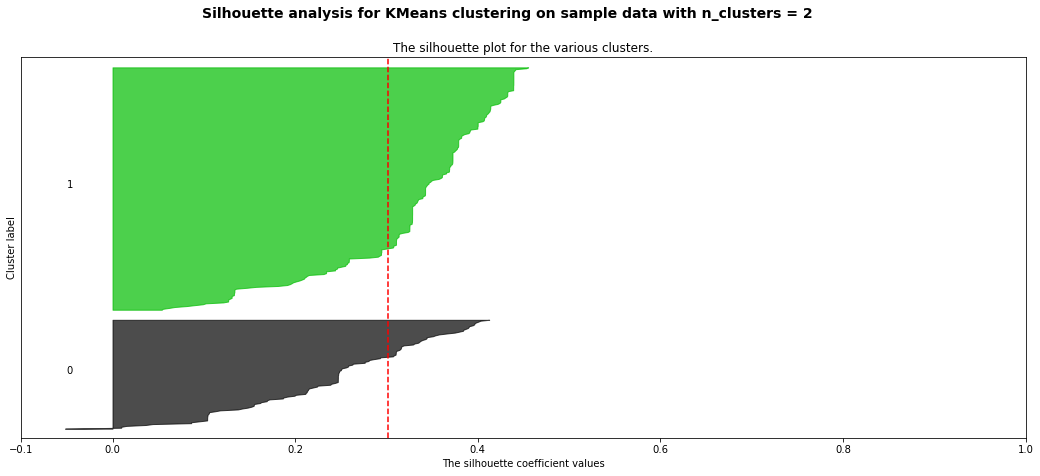

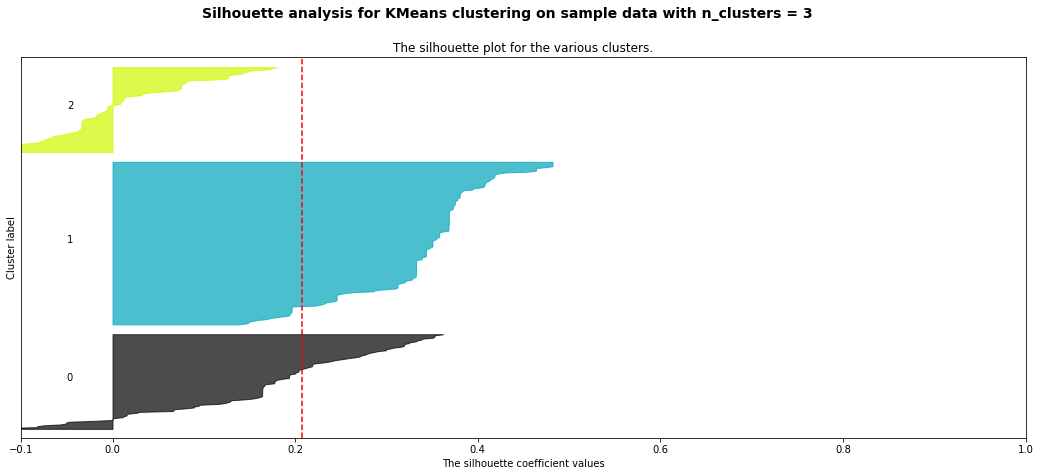

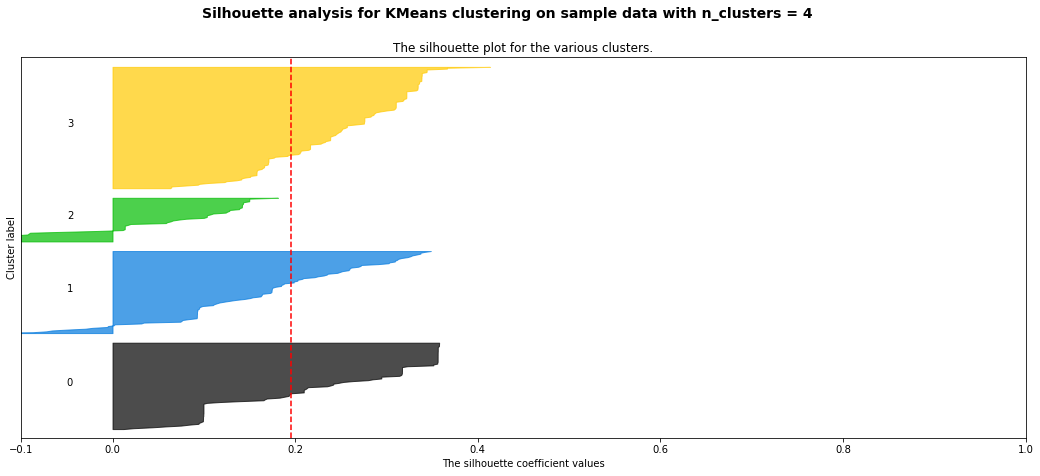

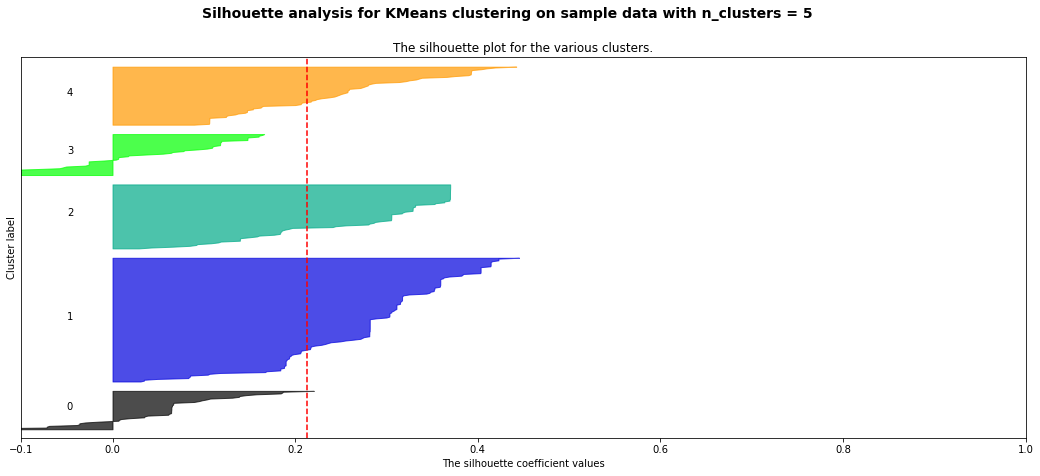

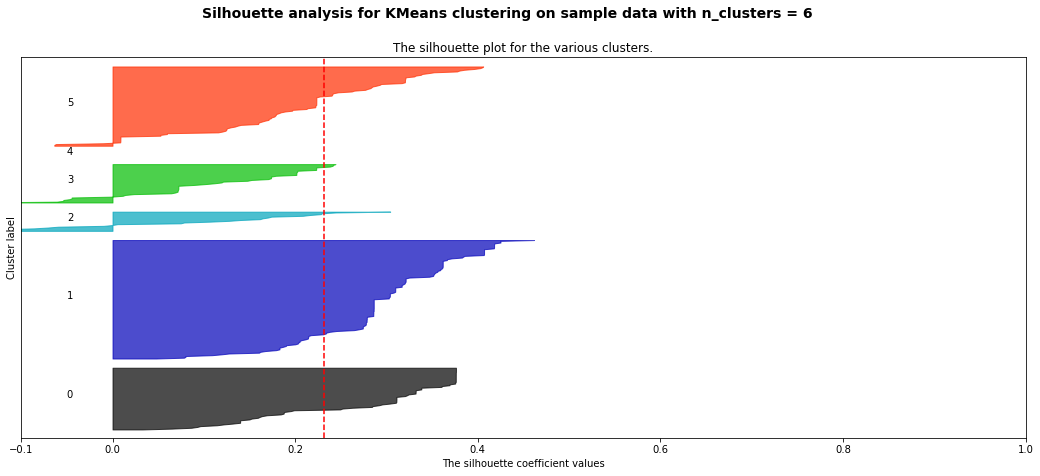

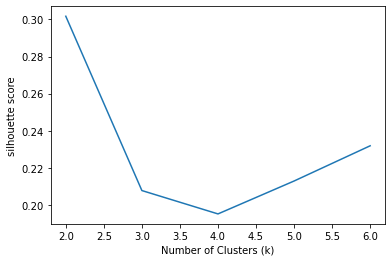

In [43]:
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg_n_clusters = []
for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])

    ax1.set_ylim([0, len(df.iloc[:,1:]) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(df.iloc[:,1:])

    silhouette_avg = silhouette_score(df.iloc[:,1:], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)

    sample_silhouette_values = silhouette_samples(df.iloc[:,1:], cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)


        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))


        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")


    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

   
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()



plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

In [46]:
km=KMeans(n_clusters=2)

In [47]:
km.fit(df.iloc[:,1:])

KMeans(n_clusters=2)

In [50]:
cl=km.predict(df.iloc[:,1:])
cl

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [51]:
df['Cluster']=cl

In [54]:
for i in range(len(df)):
    print(df['City'][i],'belongs to',df['Cluster'][i])

Tokyo belongs to 0
Jakarta belongs to 1
Delhi belongs to 1
Delhi belongs to 1
Mumbai belongs to 1
Manila belongs to 1
Shanghai belongs to 1
Seoul belongs to 0
Mexico City belongs to 1
Beijing belongs to 1
Cairo belongs to 1
Cairo belongs to 1
Cairo belongs to 1
New York belongs to 0
Moscow belongs to 1
Moscow belongs to 1
Bangkok belongs to 1
Buenos Aires belongs to 1
Buenos Aires belongs to 1
Dhaka belongs to 1
Lagos belongs to 1
Lagos belongs to 1
Karachi belongs to 1
Bangalore belongs to 1
Tehran belongs to 1
Los Angeles belongs to 0
Chennai belongs to 1
Lahore belongs to 1
Paris belongs to 0
Paris belongs to 0
Paris belongs to 0
Paris belongs to 0
Paris belongs to 0
Paris belongs to 0
London belongs to 0
London belongs to 0
London belongs to 0
London belongs to 0
London belongs to 0
London belongs to 0
London belongs to 0
London belongs to 0
Lima belongs to 1
Lima belongs to 1
Chicago belongs to 0
Kuala Lumpur belongs to 1
Hanoi belongs to 1
Pune belongs to 1
Hong Kong belongs to 0

KeyError: 240